<a href="https://colab.research.google.com/github/mekilic7/Colab/blob/main/investing_us_cotton_no_2_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gdown
!pip install tensorflow-gpu

In [4]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler

In [5]:
df_ = pd.read_csv('/content/investing_us_cotton_no_2.csv')

In [6]:
df_.info()
df_['Şimdi'] = df_['Şimdi'].str.replace(',','.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   3113 non-null   object
 1   Şimdi   3113 non-null   object
 2   Açılış  3113 non-null   object
 3   Yüksek  3113 non-null   object
 4   Düşük   3113 non-null   object
 5   Hac.    3113 non-null   object
 6   Fark %  3113 non-null   object
dtypes: object(7)
memory usage: 170.4+ KB


In [7]:
df_['Şimdi'] = df_['Şimdi'].astype(float, errors = 'raise')

In [8]:
df_.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,17.11.2021,118.30,"117,82","118,78","117,61",-,"0,46%"
1,16.11.2021,117.76,"117,78","118,34","117,11",-,"0,08%"
2,15.11.2021,117.67,"117,73","118,18","116,51",-,"0,06%"
3,12.11.2021,117.60,"118,62","118,91","116,67",-,"-0,84%"
4,11.11.2021,118.60,"118,89","119,19","117,58",-,"-0,13%"


In [9]:
df = df_[["Tarih","Şimdi"]]

In [10]:
df.head()

,Tarih,Şimdi
0,17.11.2021,118.30
1,16.11.2021,117.76
2,15.11.2021,117.67
3,12.11.2021,117.60
4,11.11.2021,118.60


In [11]:
df.columns = ["Date","Price"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3113 non-null   object 
 1   Price   3113 non-null   float64
dtypes: float64(1), object(1)
memory usage: 48.8+ KB


In [13]:
df.head()

,Date,Price
0,17.11.2021,118.30
1,16.11.2021,117.76
2,15.11.2021,117.67
3,12.11.2021,117.60
4,11.11.2021,118.60


In [14]:
data = df.Price.values

In [15]:
data= data.reshape(-1, 1)


In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
data[:10]

array([[0.4209346 ],
       [0.41766168],
       [0.41711619],
       [0.41669192],
       [0.42275289],
       [0.42372265],
       [0.42523789],
       [0.41123704],
       [0.41335839],
       [0.41044912]])

In [17]:
timestep = 5
X = []
Y = []
for i in range(len(data)-(timestep)):
    X.append(data[i:i+timestep])
    Y.append(data[i+timestep])

In [18]:
len(data)

3113

In [19]:
len(X) , len(Y)

(3108, 3108)

In [20]:
X = np.asanyarray(X)
X = X.reshape((X.shape[0],X.shape[1],1))

In [21]:
Y = np.asanyarray(Y)

##Manuel train test seçimi##

In [22]:
k = int(0.7*len(Y))
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]

In [23]:
Ytrain = Y[:k]
Ytest = Y[k:]

In [24]:
model = Sequential()
model.add(LSTM(64,
               batch_input_shape=(None,timestep,1),     
               return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(Xtrain,
          Ytrain,
          batch_size=20,
          validation_data=(Xtest,Ytest),
          verbose=1,
          epochs=30,
          shuffle=False)

Epoch 1/30
109/109 [==============================] - 6s 17ms/step - loss: 0.0030 - val_loss: 0.0091
Epoch 2/30
109/109 [==============================] - 1s 9ms/step - loss: 5.6099e-04 - val_loss: 0.0091
Epoch 3/30
109/109 [==============================] - 1s 10ms/step - loss: 5.7861e-04 - val_loss: 0.0079
Epoch 4/30
109/109 [==============================] - 1s 10ms/step - loss: 5.4227e-04 - val_loss: 0.0061
Epoch 5/30
109/109 [==============================] - 1s 10ms/step - loss: 4.5230e-04 - val_loss: 0.0063
Epoch 6/30
109/109 [==============================] - 1s 10ms/step - loss: 4.6960e-04 - val_loss: 0.0050
Epoch 7/30
109/109 [==============================] - 1s 10ms/step - loss: 4.0259e-04 - val_loss: 0.0073
Epoch 8/30
109/109 [==============================] - 1s 10ms/step - loss: 3.9098e-04 - val_loss: 0.0065
Epoch 9/30
109/109 [==============================] - 1s 9ms/step - loss: 3.8061e-04 - val_loss: 0.0063
Epoch 10/30
109/109 [==============================] - 1s 10m

Plotting Results


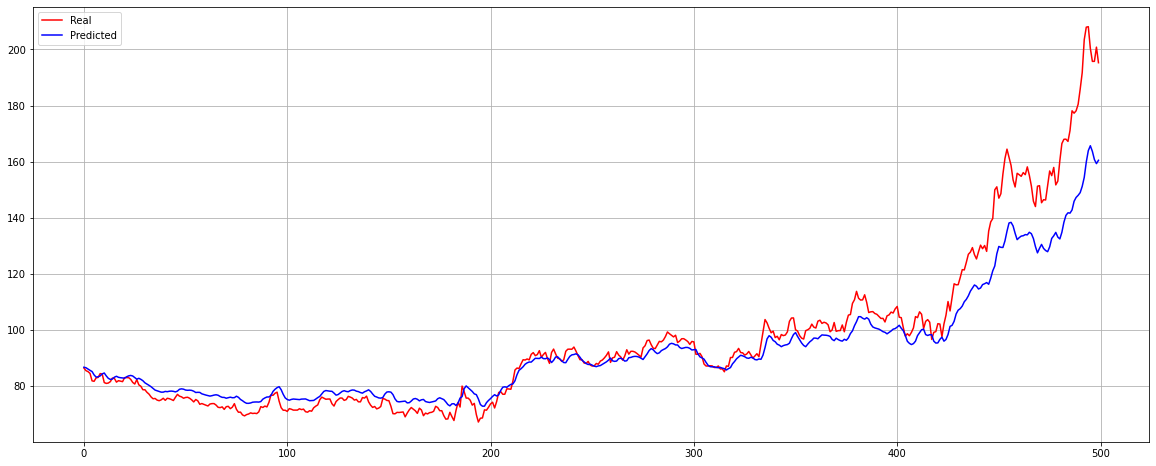

In [51]:
#500 saatlik tahmin

#rastgele başlangıc noktası seciliyor
# Başlangıç Noktasından veriler alınır ve sırayla tahminleri hesaplanır.
hour = 500
beg = random.randint(0,len(Ytest)-hour)
selected_input = Xtest[beg:beg+hour,:,:]
real_output = scaler.inverse_transform(Ytest[beg:beg+hour])
predicted_output = model.predict(selected_input, batch_size=1)
predicted_output = scaler.inverse_transform(predicted_output)
# Sonuçlar Grafik halinde gösterilir.
print('Plotting Results')
plt.figure(figsize=(20,8))
xpos = range(len(predicted_output))
plt.plot(xpos,real_output,'r',xpos,predicted_output,'b')
plt.legend(('Real','Predicted'))
plt.savefig('out.jpg',dpi=400)
plt.grid()
plt.show()

Plotting Results


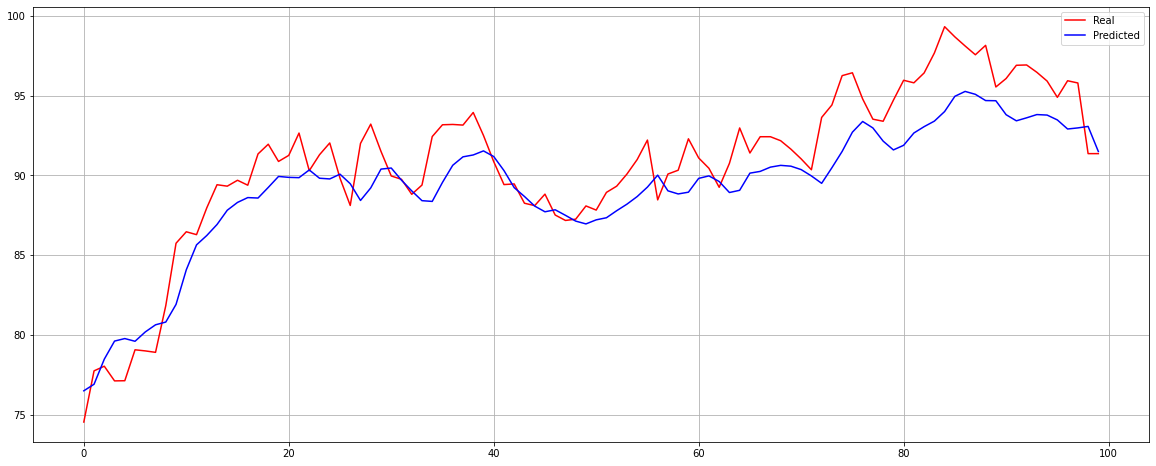

In [52]:
#100 saatlik tahmin

#rastgele başlangıc noktası seciliyor
# Başlangıç Noktasından veriler alınır ve sırayla tahminleri hesaplanır.
hour = 100
beg = random.randint(0,len(Ytest)-hour)
selected_input = Xtest[beg:beg+hour,:,:]
real_output = scaler.inverse_transform(Ytest[beg:beg+hour])
predicted_output = model.predict(selected_input, batch_size=1)
predicted_output = scaler.inverse_transform(predicted_output)
# Sonuçlar Grafik halinde gösterilir.
print('Plotting Results')
plt.figure(figsize=(20,8))
xpos = range(len(predicted_output))
plt.plot(xpos,real_output,'r',xpos,predicted_output,'b')
plt.legend(('Real','Predicted'))
plt.savefig('out.jpg',dpi=400)
plt.grid()
plt.show()

Plotting Results


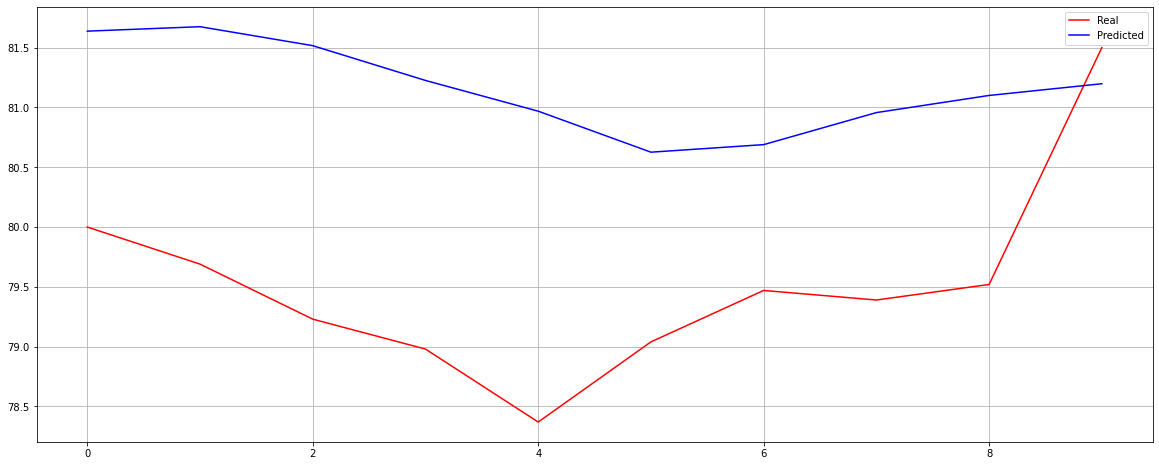

,Gerçek,Tahmin,Fark
0,80.00,81.637650,1.637650
1,79.69,81.674911,1.984911
2,79.23,81.516251,2.286251
3,78.98,81.225464,2.245464
4,78.37,80.968529,2.598529
5,79.04,80.625885,1.585885
6,79.47,80.688972,1.218972
7,79.39,80.956795,1.566795
8,79.52,81.100082,1.580082
9,81.50,81.198029,-0.301971


In [82]:
#10 saatlik tahmin

#rastgele başlangıc noktası seciliyor
# Başlangıç Noktasından veriler alınır ve sırayla tahminleri hesaplanır.
hour = 10
beg = random.randint(0,len(Ytest)-hour)
selected_input = Xtest[beg:beg+hour,:,:]
real_output = scaler.inverse_transform(Ytest[beg:beg+hour])
predicted_output = model.predict(selected_input, batch_size=1)
predicted_output = scaler.inverse_transform(predicted_output)
# Sonuçlar Grafik halinde gösterilir.
print('Plotting Results')
plt.figure(figsize=(20,8))
xpos = range(len(predicted_output))
plt.plot(xpos,real_output,'r',xpos,predicted_output,'b')
plt.legend(('Real','Predicted'))
plt.savefig('out.jpg',dpi=400)
plt.grid()
plt.show()


df_result = pd.DataFrame()
df_r1 = pd.DataFrame(real_output, columns = ['real'])
df_r2 = pd.DataFrame(predicted_output, columns = ['predicted'])
df_result['Gerçek'] = df_r1['real']
df_result['Tahmin'] = df_r2['predicted']
df_result['Fark'] = df_result['Tahmin'] - df_result['Gerçek'] 
df_result

##Random Train test seçimi ##

In [29]:
from sklearn.model_selection import train_test_split
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, Y, test_size=0.30, random_state=42)

In [30]:
model_r = Sequential()
model_r.add(LSTM(64,
               batch_input_shape=(None,timestep,1),     
               return_sequences=True))
model_r.add(Dropout(0.2))
model_r.add(LSTM(64,return_sequences=False))
model_r.add(Dropout(0.2))
model_r.add(Dense(1))
model_r.compile(loss='mse', optimizer='adam')

In [ ]:
model_r.fit(X_train_rand,
          y_train_rand,
          batch_size=20,
          validation_data=(X_test_rand,y_test_rand),
          verbose=1,
          epochs=30,
          shuffle=False)

Plotting Results


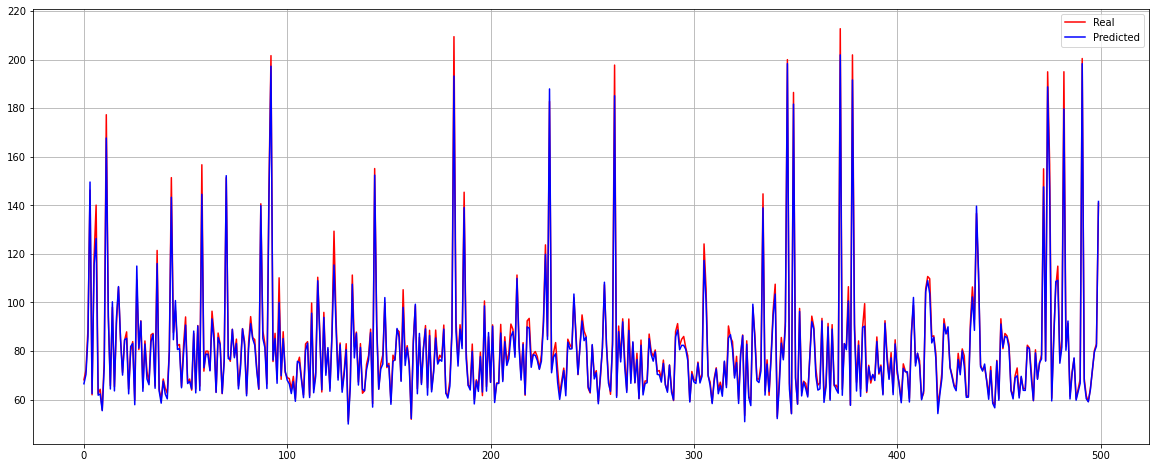

In [64]:
#500 saatlik tahmin 
hour_r = 500
beg_r = random.randint(0,len(y_test_rand)-hour_r)
selected_input_r = X_test_rand[beg_r:beg_r+hour_r,:,:]
real_output_r = scaler.inverse_transform(y_test_rand[beg_r:beg_r+hour_r])
predicted_output_r = model_r.predict(selected_input_r, batch_size=1)
predicted_output_r = scaler.inverse_transform(predicted_output_r)
# Sonuçlar Grafik halinde gösterilir.
print('Plotting Results')
plt.figure(figsize=(20,8))
xpos = range(len(predicted_output_r))
plt.plot(xpos,real_output_r,'r',xpos,predicted_output_r,'b')
plt.legend(('Real','Predicted'))
plt.savefig('out_r.jpg',dpi=500)
plt.grid()
plt.show()

Plotting Results


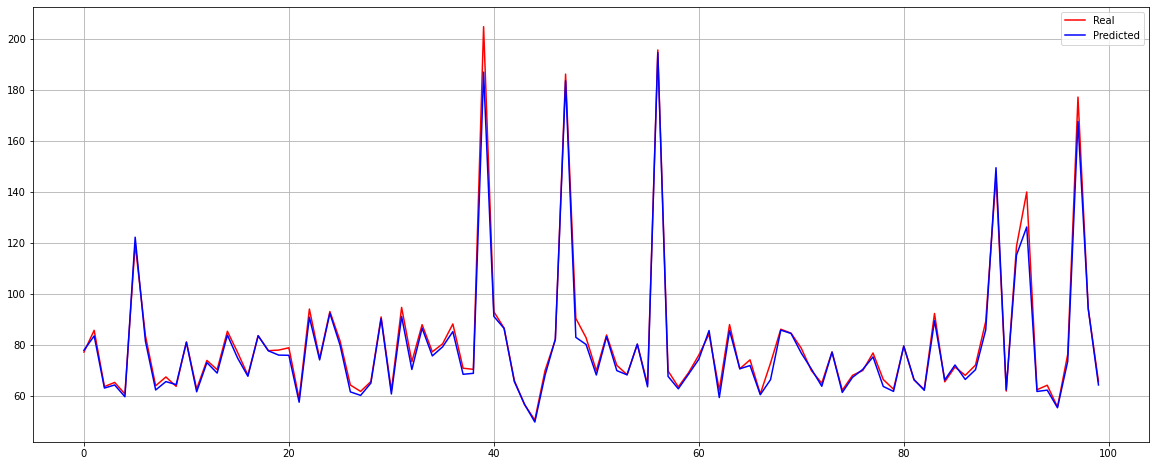

In [65]:
#100 saatlik tahmin 
hour_r = 100
beg_r = random.randint(0,len(y_test_rand)-hour_r)
selected_input_r = X_test_rand[beg_r:beg_r+hour_r,:,:]
real_output_r = scaler.inverse_transform(y_test_rand[beg_r:beg_r+hour_r])
predicted_output_r = model_r.predict(selected_input_r, batch_size=1)
predicted_output_r = scaler.inverse_transform(predicted_output_r)
# Sonuçlar Grafik halinde gösterilir.
print('Plotting Results')
plt.figure(figsize=(20,8))
xpos = range(len(predicted_output_r))
plt.plot(xpos,real_output_r,'r',xpos,predicted_output_r,'b')
plt.legend(('Real','Predicted'))
plt.savefig('out_r.jpg',dpi=500)
plt.grid()
plt.show()

Plotting Results


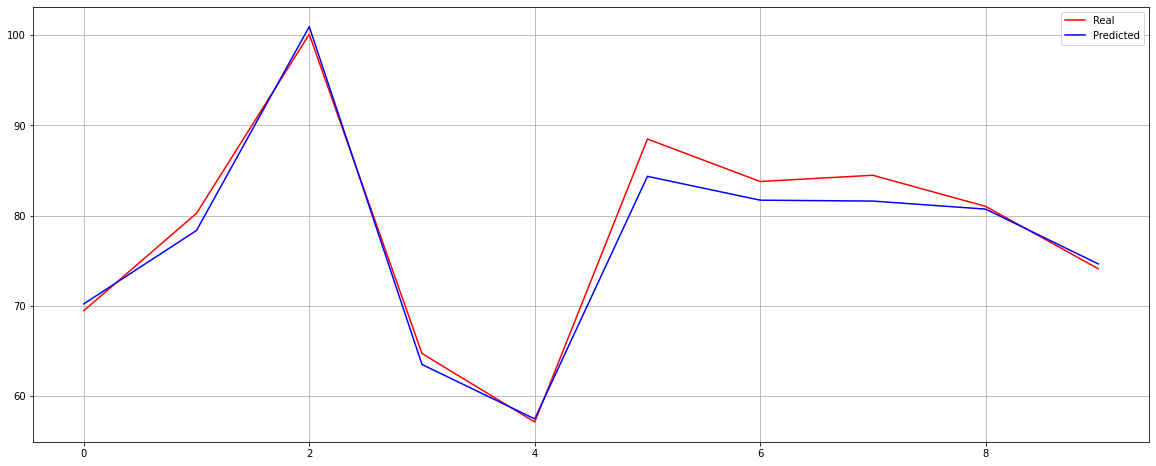

,Gerçek,Tahmin,Fark
0,69.46,70.208633,0.748633
1,80.25,78.353340,-1.896660
2,100.10,100.944565,0.844565
3,64.71,63.492104,-1.217896
4,57.11,57.454391,0.344391
5,88.49,84.351151,-4.138849
6,83.78,81.709503,-2.070497
7,84.47,81.609314,-2.860686
8,81.02,80.717331,-0.302669
9,74.10,74.637230,0.537230


In [81]:
#100 saatlik tahmin 
hour_r = 10
beg_r = random.randint(0,len(y_test_rand)-hour_r)
selected_input_r = X_test_rand[beg_r:beg_r+hour_r,:,:]
real_output_r = scaler.inverse_transform(y_test_rand[beg_r:beg_r+hour_r])
predicted_output_r = model_r.predict(selected_input_r, batch_size=1)
predicted_output_r = scaler.inverse_transform(predicted_output_r)
# Sonuçlar Grafik halinde gösterilir.
print('Plotting Results')
plt.figure(figsize=(20,8))
xpos = range(len(predicted_output_r))
plt.plot(xpos,real_output_r,'r',xpos,predicted_output_r,'b')
plt.legend(('Real','Predicted'))
plt.savefig('out_r.jpg',dpi=500)
plt.grid()
plt.show()

df_result_r = pd.DataFrame()
df_r1_r = pd.DataFrame(real_output_r, columns = ['real'])
df_r2_r = pd.DataFrame(predicted_output_r, columns = ['predicted'])
df_result_r['Gerçek'] = df_r1_r['real']
df_result_r['Tahmin'] = df_r2_r['predicted']
df_result_r['Fark'] = df_result_r['Tahmin'] - df_result_r['Gerçek'] 
df_result_r

